In [4]:
from scipy import interpolate
from scipy.interpolate import lagrange
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Função de Runge
def runge (X):
     return 1.0 / (1.0 + 25.0 * X ** 2)

In [6]:
'''     
Interpolação polinomial da função de Runge em k pontos uniformemente espaçados por meio da
interpolação de Lagrange
''' 
def runge_linspace_interpolate(k):
    X = np.linspace(-1.0, 1.0, k)
    Y = runge(X)

    return lagrange(X, Y)

# Interpolação polinomial da função de Runge em k pontos uniformemente espaçados por meio de Splines
def runge_linspace_cubicSpline(k):
    X = np.linspace(-1.0, 1.0, k)
    Y = runge(X)

    return interpolate.CubicSpline(X,Y)

In [7]:
# Plota os gráficos da função de Runge e do polinômio interpolador
def plot():
    plot_x = np.linspace(-1.0, 1.0, 200)
    fig = plt.figure(constrained_layout=True)
    ax = fig.subplots(3,4)
    k = 3

    for i in range(3):
        for j in range(4):
            spl = runge_linspace_cubicSpline(k)

            ax[i,j].plot(plot_x, spl(plot_x))
            ax[i,j].plot(plot_x, runge(plot_x))
            ax[i,j].set_title(f"$k$ = {k}")

            k += 1
    plt.show()

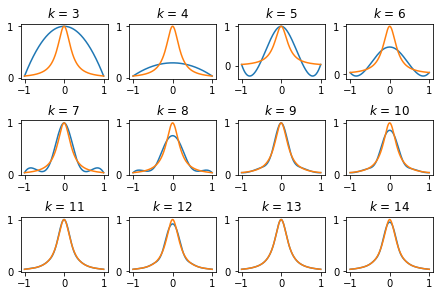

In [8]:
plot()

In [9]:
# Plota o maior erro absoluto da interpolação em função de k com pontos linearmente espaçados
def plot_eK():
    err_val = []

    x = np.linspace(-1.0, 1.0, 200)
    k = np.arange(2, 25)

    # Aplicando splines cúbicas naturais
    for n in k:
        spl = runge_linspace_cubicSpline(n)
        err_s = lambda x : abs( runge(x) - spl(x) )
        err_val.append( np.max(err_s(x)) )

    # Plota o gŕafico de e_k por k
    plt.xlabel("k")
    plt.ylabel("$e_k$")
    plt.plot(k, err_val, 'b')
    plt.title('$e_k$ por $k$')
    
    plt.show()

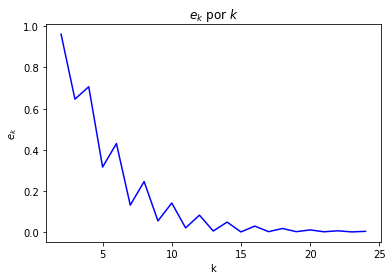

In [10]:
plot_eK()

In [11]:
# Funcão aproximada do erro absoluto
def func(h, C, q):
	return C*h**q

In [12]:
# Plota o maior erro absoluto da interpolação e a função aproximada do erro
def plot_minquad():
    err_val = []

    plot_x = np.arange(2, 25, 0.001)
    x = np.linspace(-1.0, 1.0, 200)
    k = np.arange(2, 25)

    # Aplicando splines cubicas naturais
    for n in k:
        spl = runge_linspace_cubicSpline(n)
        err_s = lambda x : abs( runge(x) - spl(x) )
        err_val.append(np.max(err_s(x)))

    # Método dos Mínimos Quadrados
    # h = 2/k
    popt, pcov = curve_fit(func, 2/k, err_val)

    plt.plot(k, err_val, label="Erro máximo spline natural")
    plt.plot(plot_x, func(2/plot_x, *popt), 'r-',
            label='Mínimos quadrados: C=%5.3f, q=%5.3f' % tuple(popt))
    
    plt.title(label = "Erro máximo e mínimos quadrados por k")
    plt.xlabel('k', fontsize=12)
    plt.ylabel('e_k', fontsize=12)
    plt.legend()
    
    plt.show()

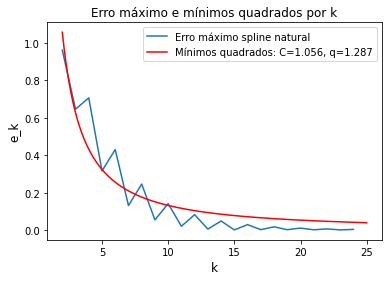

In [13]:
plot_minquad()

In [14]:
# Plota o maior erro absoluto da interpolação por Lagrange e por Splines em função de k
def plot_comparision():
    plot_x = np.linspace(-1.0, 1.0, 200)
    fig = plt.figure(constrained_layout=True)

    err_lagrange = []
    err_spline = []

    k = np.arange(2, 40)

    for n in k:
        poly = runge_linspace_interpolate(n)
        spl = runge_linspace_cubicSpline(n)
        err_l = lambda x : abs( runge(x) - poly(x) )
        err_s = lambda x : abs( runge(x) - spl(x) )

        err_lagrange.append(np.max(err_l(plot_x)))
        err_spline.append(np.max(err_s(plot_x)))

    plt.plot(k, err_lagrange, 'b', label = "Erro para a interpolação")
    plt.plot(k, err_spline, 'r', label = "Erro para as Splines")

    plt.legend()
    plt.xlabel("$k$")
    plt.ylabel("$e_k$")
    
    plt.show()

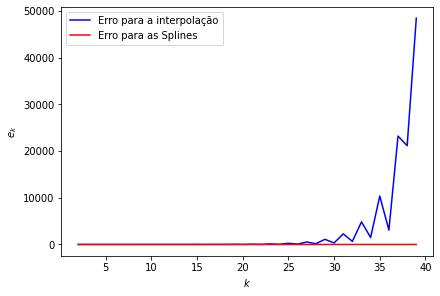

In [15]:
plot_comparision()